# Setup

## imports

In [5]:
import pandas as pd
import os
from pandasql import sqldf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

os.chdir('..')

pysqldf = lambda q: sqldf(q, globals())



## datasets

In [3]:
tracking2020 = pd.read_csv('tracking2020.csv')
tracking2019 = pd.read_csv('tracking2019.csv')
tracking2018 = pd.read_csv('tracking2018.csv')
tracking = tracking2020.append(tracking2019).append(tracking2018)

games = pd.read_csv('games.csv')
pff = pd.read_csv('PFFScoutingData.csv')
players = pd.read_csv('players.csv')
plays = pd.read_csv('plays.csv')

In [51]:
q = """select
                     t.*,
                     games.season,
                     games.week,
                     games.gameDate,
                     games.gameTimeEastern,
                     games.hometeamAbbr as homeTeam,
                     games.visitorTeamAbbr as awayTeam,
                     players.height as playerHeight,
                     players.weight as playerWeight,
                     julianday('now') - julianday(players.birthDate) as playerAgeDays,
                     pff.snapDetail,
                     pff.snapTime,
                     pff.operationTime,
                     pff.hangTime,
                     pff.kickType,
                     pff.kickContactType,
                     plays.kickLength,
                     plays.kickReturnYardage,
                     pff.kickDirectionIntended,
                     pff.kickDirectionActual,
                     pff.returnDirectionIntended,
                     pff.returnDirectionActual,
                     pff.missedTackler,
                     pff.assistTackler,
                     pff.tackler,
                     pff.kickoffReturnFormation,
                     pff.gunners,
                     pff.puntRushers,
                     pff.specialTeamsSafeties,
                     pff.vises,
                     plays.quarter,
                     plays.down,
                     plays.yardsToGo,
                     plays.possessionTeam,
                     plays.specialTeamsPlayType,
                     plays.specialTeamsResult,
                     plays.kickerId,
                     plays.returnerId,
                     plays.kickBlockerId,
                     plays.yardlineSide,
                     plays.yardlineNumber,
                     plays.gameClock,
                     plays.penaltyCodes,
                     plays.penaltyJerseyNumbers,
                     plays.penaltyYards,
                     plays.preSnapHomeScore,
                     plays.preSnapVisitorScore,
                     plays.passResult,
                     plays.playResult,
                     plays.absoluteYardlineNumber
              from tracking2020 t
              left join games on games.gameId = t.gameID
              left join players on players.nflId = t.nflId
              left join plays on plays.gameId = t.gameId
                            and plays.playId = t.playId
              left join pff on pff.gameId = t.gameId
                     and pff.playId = t.playId 
              """

tracking_master = pysqldf(q)
tracking_master.to_pickle('tracking_master_df.pkl')

In [52]:
tracking_master.head(3)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,season,week,gameDate,gameTimeEastern,homeTeam,awayTeam,playerHeight,playerWeight,playerAgeDays,snapDetail,snapTime,operationTime,hangTime,kickType,kickContactType,kickLength,kickReturnYardage,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber
0,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,40,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,3.73,D,None,75.0,NaN,C,C,None,None,None,None,None,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Touchback,46298.0,None,NaN,MIA,35,15:00:00,None,None,NaN,0,0,None,40,75
1,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,40,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,3.73,D,None,75.0,NaN,C,C,None,None,None,None,None,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Touchback,46298.0,None,NaN,MIA,35,15:00:00,None,None,NaN,0,0,None,40,75
2,2021-01-03T18:03:02.400,61.23,46.76,0.10,0.18,0.01,183.38,108.95,None,42901.0,Dean Marlowe,31.0,SS,home,3,2021010300,40,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,3.73,D,None,75.0,NaN,C,C,None,None,None,None,None,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Touchback,46298.0,None,NaN,MIA,35,15:00:00,None,None,NaN,0,0,None,40,75


In [53]:
tracking_master.isna().sum()

time                              0
x                                 0
y                                 0
s                                 0
a                                 0
dis                               0
o                            513987
dir                          513987
event                             0
nflId                        513987
displayName                       0
jerseyNumber                 513987
position                     513987
team                              0
frameId                           0
gameId                            0
playId                            0
playDirection                     0
season                            0
week                              0
gameDate                          0
gameTimeEastern                   0
homeTeam                          0
awayTeam                          0
playerHeight                 513987
playerWeight                 513987
playerAgeDays                640323
snapDetail                  

# EDA

## collapsable

In [54]:
# seems like we are missing some games
q = """SELECT season, count(distinct gameId)
       FROM games 
       group by 1
       """

names = pysqldf(q)
names

,season,count(distinct gameId)
0,2018,253
1,2019,255
2,2020,256


In [55]:
plays.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,"J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.",1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Center-J.Overbaugh, Holder-M.Bosher.",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13


In [65]:
q = """SELECT distinct specialTeamsPlayType, specialTeamsResult, count(*)
       FROM plays 
       group by 1, 2
       """
play_type = pysqldf(q)
play_type


,specialTeamsPlayType,specialTeamsResult,count(*)
0,Extra Point,Blocked Kick Attempt,24
1,Extra Point,Kick Attempt Good,3252
2,Extra Point,Kick Attempt No Good,199
3,Extra Point,Non-Special Teams Result,13
4,Field Goal,Blocked Kick Attempt,37
5,Field Goal,Downed,1
6,Field Goal,Kick Attempt Good,2218
7,Field Goal,Kick Attempt No Good,386
8,Field Goal,Non-Special Teams Result,14
9,Field Goal,Out of Bounds,1


In [64]:
q = """SELECT count(*)
       FROM plays 
       
       """
play_type = pysqldf(q)
play_type


,count(*)
0,19979


In [13]:
q = """SELECT playDescription, playResult
       FROM plays 
       where specialTeamsPlayType = 'Kickoff' and
              specialTeamsResult = 'Return'
              and playResult < 0  
       limit 100 
       """
play_type = pysqldf(q)
play_type


,playDescription,playResult
0,"R.Succop kicks 67 yards from TEN 35 to MIA -2. J.Grant for 102 yards, TOUCHDOWN.",-35
1,"J.Sanders kicks 59 yards from MIA 35 to TEN 6. D.Jennings for 94 yards, TOUCHDOWN.",-35
2,(Onside Kick formation) S.Hauschka kicks onside 13 yards from BUF 35 to BUF 48. K.Allen to BUF 23 for 25 yards (S.Neal).,-12
3,"S.Martin kicks 66 yards from DET 35 to SF -1. D.Reed for 101 yards, TOUCHDOWN NULLIFIED by Penalty. PENALTY on SF-D.Reed, Face Mask (15 Yards), 15 yards, enforced at DET 11.",-9
4,S.Gostkowski kicks 65 yards from NE 35 to KC 0. Tr. Smith to NE 3 for 97 yards (D.McCourty).,-32
5,"C.Parkey kicks 60 yards from CHI 35 to NE 5. C.Patterson for 95 yards, TOUCHDOWN.",-35
6,B.Pinion kicks 69 yards from SF 35 to SEA -4. T.Lockett to SF 20 for 84 yards (J.Tartt).,-15
7,S.Hauschka kicks 59 yards from BUF 35 to NYJ 6. A.Roberts to BUF 8 for 86 yards (D.Rice).,-27
8,"R.Bullock kicks onside 9 yards from CIN 35 to CIN 44. A.Phillips (didn't try to advance) to CIN 44 for no gain. LAC-A.Ekeler was injured during the play. PENALTY on CIN-C.Fejedelem, Illegal Block Above the Waist, 10 yards, enforced at CIN 44. Penalty on CIN-R.Bullock, Illegal Touch Kick, declined.",-1
9,D.Carlson kicks 63 yards from OAK 35 to CIN 2. A.Erickson pushed ob at OAK 21 for 77 yards (E.Harris).,-14


In [12]:
q = """SELECT playResult, count(*)
       FROM plays 
       where specialTeamsPlayType = 'Kickoff' and
              specialTeamsResult = 'Return'
            --  and playDescription like '%touchdown%' 
        group by 1
       limit 100 
       """
play_type = pysqldf(q)
play_type


,playResult,count(*)
0,-35,18
1,-32,1
2,-31,1
3,-27,1
4,-17,2
5,-15,2
6,-14,3
7,-12,3
8,-10,1
9,-9,1


# simulating individual plays

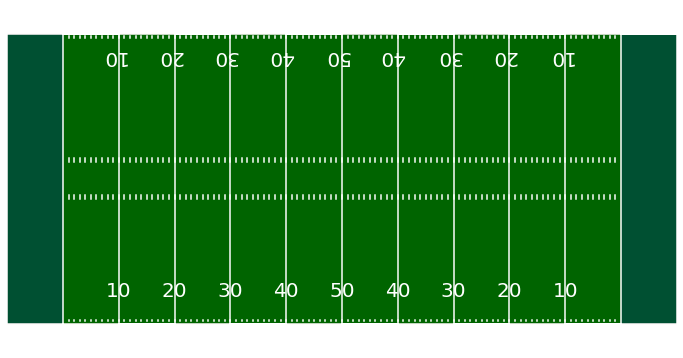

In [14]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()

No handles with labels found to put in legend.


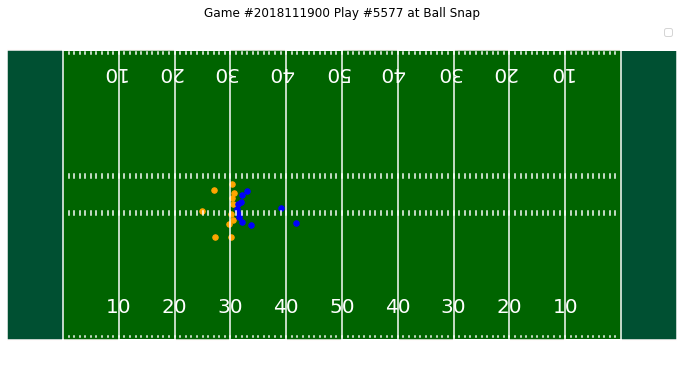

In [30]:
example_play_home = tracking2020.query('gameId == 2021010300 and playId == 376 and team == "home"')
example_play_away = tracking2020.query('gameId == 2021010300 and playId == 376 and team == "away"')

fig, ax = create_football_field()
example_play_home.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
example_play_away.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title('Game #2018111900 Play #5577 at Ball Snap')
plt.legend()
plt.show()


In [ ]:
def plot_presnap_alignment(df, gameId, playId):
    example_play_home = tracking2020.query(f'gameId == {gameID} and playId == {playId} and team == "home"')
    example_play_away = tracking2020.query(f'gameId == {gameID} and playId == {playId} and team == "away"')

    fig, ax = create_football_field()
    example_play_home.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
    example_play_away.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
    plt.title(f'Game {gameID} Play {playId} at Ball Snap')
    plt.legend()
    plt.show()


No handles with labels found to put in legend.


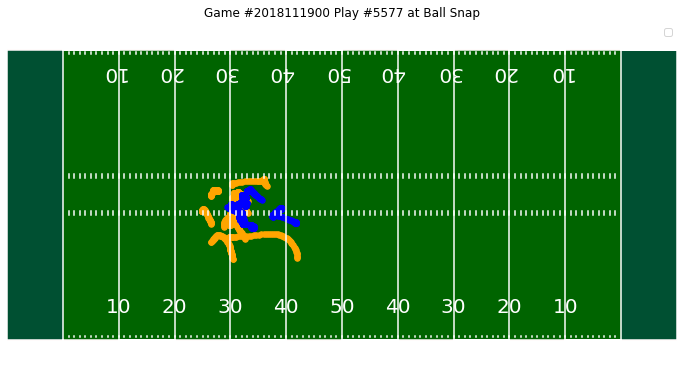

In [31]:
fig, ax = create_football_field()
example_play_home.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
example_play_away.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title('Game #2018111900 Play #5577')
plt.legend()
plt.show()